# Transformada cuántica de Fourier y algoritmo de estimación de fases

### Importamos las herramientas necesarias:

In [1]:
import qiskit

In [2]:
from qiskit import *

In [3]:
from qiskit.visualization import plot_histogram

In [4]:
import math

In [5]:
from math import pi

In [6]:
import matplotlib

In [7]:
%matplotlib inline

### Transformada cuántica de Fourier

Recordemos que la transformada cuántica de Fourier mapea la base computacional de n qubits a una base ortogonal en la que todos sus elementos son una combinación líneal homogenea (con la misma amplitud) de la base computacional. Esta propiedad la hace útil en diversas áreas de la física fundamentadas en la mecánica cuántica. En particular, en computación cuántica se utiliza en el algoritmo de estimación de fases y el algoritmo de Shor entre otros.

Implementaremos primero el circuito que ejecuta la transformada cuántica de Fourier, y con ésta inicializar el estado para el algoritmo de estimación de fases.

En este caso, dada la simplicidad de las compuertas que se usarán, es posible definir la transformada cuántica de Fourier para un número de qubits n arbitrario.

Utilizaremos la convención usual en el orden de los qubits, es decir la convención de qiskit, la cual está al revés de la convención de las notas.

In [8]:
def Fourier(n, circuit):
    
    for i in range(0,n):
        circuit.h(i)
        for j in range(i+1,n):
            l = 2*pi/(2**(j-i+1))
            circuit.cu1(l,j,i)

Definamos un circuito para visualizar la transformada cuántica de Fourier en el caso n=3. Si al final de este circuito añadimos mediciones en cada uno de los qubits, esperamos que cada posible combinación salga con la misma probabilidad.

In [18]:
n = 3
fc = QuantumCircuit(n,n)

In [19]:
Fourier(n, fc)
fc.barrier(range(0,n))
fc.measure(range(0,n),range(0,n))

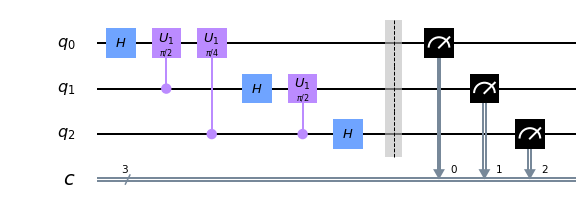

In [20]:
fc.draw(output = 'mpl')

### Visualización de las mediciones (transformada cuántica de Fourier)

In [21]:
qasm = Aer.get_backend('qasm_simulator')

In [22]:
job = execute(fc, qasm, shots=1000)
result = job.result()
counts = result.get_counts(fc)

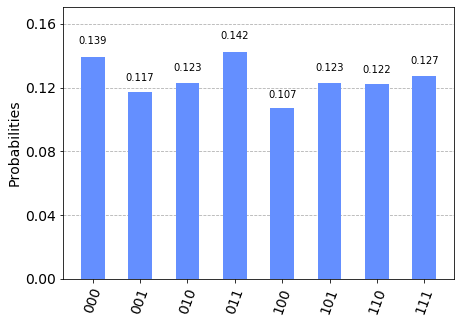

In [23]:
plot_histogram(counts)

### Algoritmo de estimación de fases

El algoritmo de estimación de fases toma como entrada un estado de n qubits en una superposición como la de la transformada cuántica de Fourier, y cálcula la fase que éste usa. Esta fase codifica la serie de bits (el estado en la base computacional) en la que se aplicó la transformada de Fourier. Es decir, el algoritmo de estimación de fases ejecuta la operación inversa a la transformada cuántica de Fourier.

Verifiquemos lo anterior aplicando la transformada cuántica de Fourier al estado w = 100010, y luego ejecutando el algoritmo de estimación de fases.

Nótese que el circuito que ejecuta el algoritmo de estimación de fases, debido a las compuertas utilizadas, es identico a leer el circuito que implementa la transformada cuántica de Fourier de derecha a izquierda, cambiando únicamente el signo de la fase de las compuertas cu1.

In [24]:
n = 6
qc = QuantumCircuit(n,n)

In [25]:
# Inicializando en el estado w=100010

qc.x(1)
qc.x(5)
qc.barrier(range(0,n))

In [26]:
# Aplicando la transformada de Fourier para inicializar el circuito en el estado de entrada del algoritmo de estimación de fases

Fourier(n, qc)
qc.barrier(range(0,n))

In [28]:
# Algoritmo de estimación de fases

for i in range(0,n-1):
    qc.h(n-i-1)
    for j in range(0,i+1):
        l = 2*pi/(2**(i-j+2))
        qc.cu1(-l,n-j-1,n-i-2)
qc.h(0)

In [29]:
qc.barrier(range(0,n))
qc.measure(range(0,n),range(0,n))

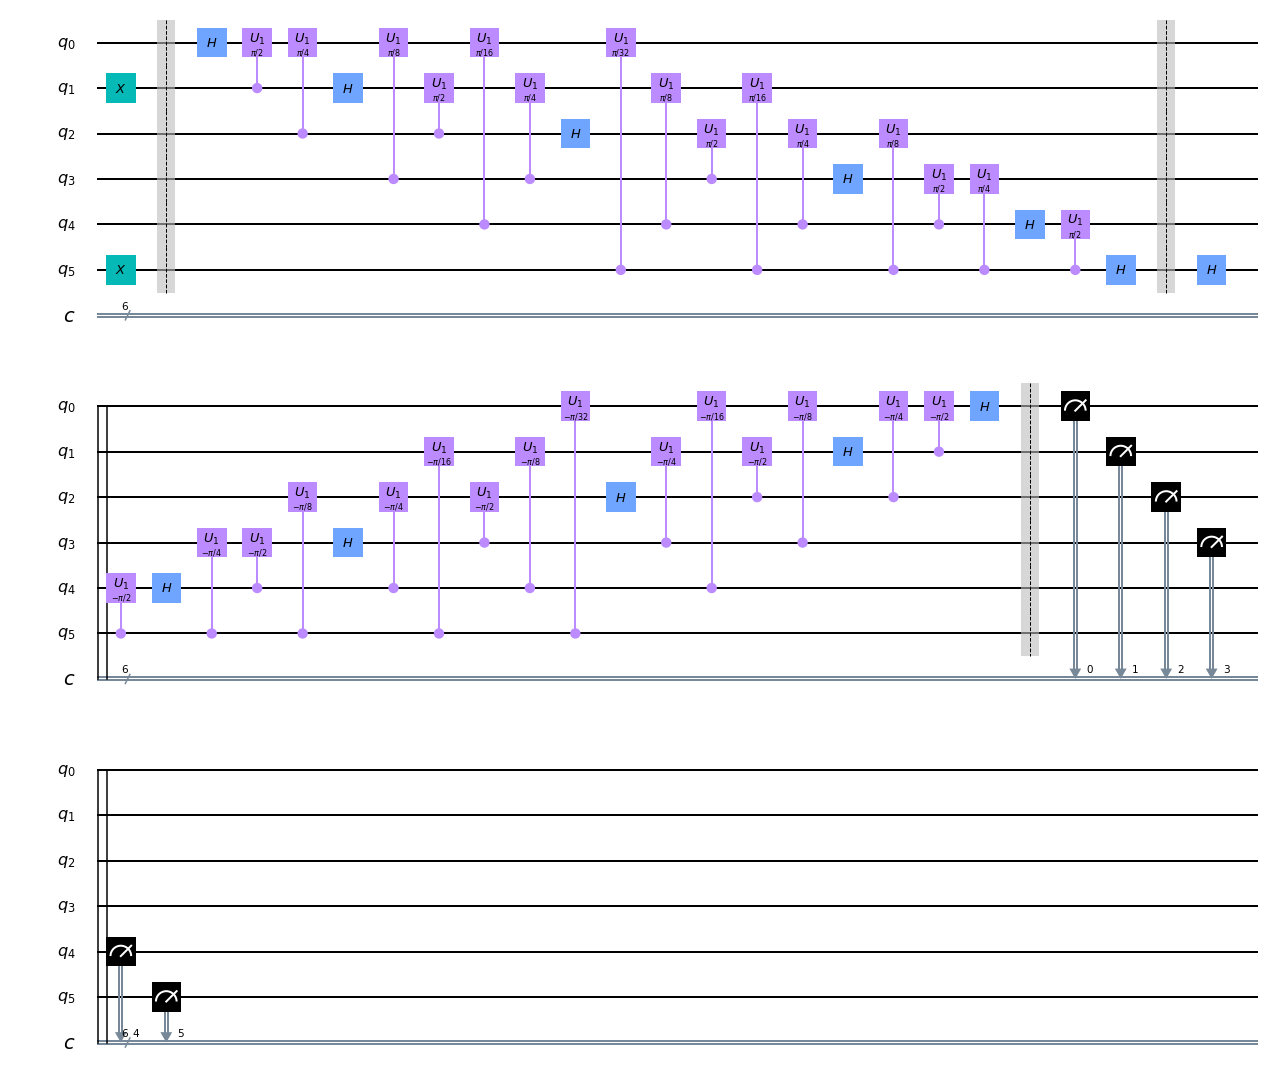

In [30]:
qc.draw(output = 'mpl')

### Visualización de las mediciones (algoritmo de estimación de fases)

In [31]:
job = execute(qc, qasm, shots=1000)
result = job.result()
counts = result.get_counts(qc)

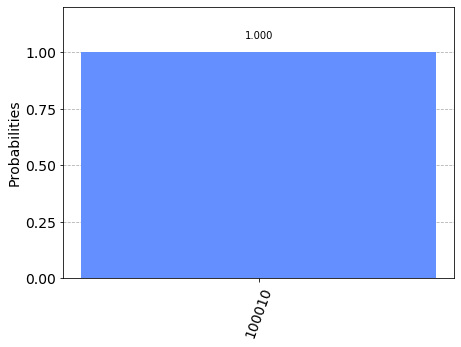

In [32]:
plot_histogram(counts)